$\textbf{Autor rozwiązania: Piotr Koneczny (numer indeksu: 258086). Rozwiązanie pisałem i testowałem na wersji Pythona: 3.13.2.}$

Organizacja pliku jest następująca. Przed sekcją "Przeszukiwanie grafów" jest kod, który miałem wcześniej w pliku, do zadania 4 włącznie (Podstawowe algorytmy grafowe, np. postorder, preorder itp). Później w sekcji Przeszukiwanie grafów wstawiam kod klasy Graph z zajęć z pliku Grafy6.ipynb (ściągniętego w środę 07.05 o godz. 11:30) i robię zadania z tej pracy domowej, a więc Przeszukiwanie grafów.

# Implementacja podstawowych funkcji grafowych

In [1]:
#Importujemy potrzebne biblioteki
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy

#Definiujemy główną klasę Graph
class Graph:
    def __init__(self, vertices:list = None, matrix:np.array = None, graph_dict:dict = None, \
                 n_to_generate = 10, p_to_generate = 1/3, generate_cycle:bool = False, \
                 generate_bipartite:bool = False, generate = True):
        self.vertices = vertices
        self.matrix = matrix
        self.graph_dict = graph_dict

        self.n = None
        self.n_to_generate = n_to_generate
        self.p_to_generate = p_to_generate
        self.generate_cycle = generate_cycle
        self.generate_bipartite = generate_bipartite

        if self.matrix is None and self.graph_dict is not None:
            self.vertices, self.matrix = self.graph_to_matrix(self.graph_dict, return_vertices = True)
            self.n = len(self.matrix)
        elif self.graph_dict is None:
            if self.matrix is not None:
                if self.matrix.shape[0] != self.matrix.shape[1]:
                    raise Exception("Użytkowniku! Podana macierz sąsiedztwa musi być macierzą kwadratową.")
                self.matrix = np.array(self.matrix).astype(int)
                self.n = len(self.matrix)
                self.vertices, self.graph_dict = self.matrix_to_graph(self.vertices, self.matrix, return_vertices = True)
            else:
                if generate:
                    self.generate_graph()
                    self.vertices, self.graph_dict = self.matrix_to_graph(self.vertices, self.matrix, return_vertices = True)
        elif self.matrix is not None and self.graph_dict is not None:
            raise Exception("Użytkowniku! Zdecyduj się. Albo podajesz tylko matrix, albo tylko graph_dict. Możesz też opcjonalnie podać vertices.")

    def generate_graph(self):
        self.n = self.n_to_generate
        vertices_temp = deepcopy(self.vertices)
        self.vertices = list(range(1, self.n + 1))  # Wierzchołki od 1 do n
        self.matrix = np.zeros((self.n, self.n), dtype=int)
        self.graph_dict = {v: [] for v in self.vertices}  # Inicjalizacja pustego grafu

        if self.generate_bipartite:  # Jeśli chcemy graf dwudzielny
            # Generujemy dwa zbiory wierzchołków
            set_a = list(range(1, self.n // 2 + 1))
            set_b = list(range(self.n // 2 + 1, self.n + 1))
            for i in set_a:
                for j in set_b:
                    if np.random.random() < self.p_to_generate:
                        self.add_edge(False, i, j)
        elif not self.generate_cycle:  # Jeśli chcemy cykl, dodajemy dodatkowe krawędzie
            for i in range(self.n):  # Przechodzimy przez każdy wierzchołek (od 1 do n)
                for j in range(i):  # Łączymy tylko wcześniejsze wierzchołki (nie powtarzamy)
                    if np.random.random() < self.p_to_generate:
                        self.add_edge(False, self.vertices[i], self.vertices[j])
        else:  # Generowanie cyklu
            for i in range(self.n - 1):
                self.add_edge(False, i + 1, i + 2)
            self.add_edge(False, self.n, 1)

        self.vertices = vertices_temp
            
    def matrix_to_graph(self, vertices:list, matrix:np.array, return_vertices:bool = True):
        n = len(matrix)
        graph_dict = dict()
        if (vertices is None) or (len(vertices) != n):
            Warning("Użytkowniku! Podałeś nieodpowiednią ilość nazw dla wierzchołków. Staną się więc one liczbami w zakresie od 1 do {} włącznie.".format(n))
            vertices = list(range(1,n+1))
        for i in range(n):
            indexes_of_i_neighbors = list()
            for j in range(n):
                if matrix[i,j]:
                    indexes_of_i_neighbors.append(j)
            i_neighbors = [vertices[index] for index in indexes_of_i_neighbors]
            graph_dict[vertices[i]] = i_neighbors
        if return_vertices:
            return vertices, graph_dict
        else:
            return graph_dict
        
    def graph_to_matrix(self, graph_dict:dict, return_vertices:bool = True):
        vertices = list(graph_dict.keys())
        n = len(vertices)
        matrix = np.zeros(shape = (n,n), dtype=int)

        for vertex in vertices:
            for neighbor in graph_dict[vertex]:
                matrix[vertices.index(vertex), vertices.index(neighbor)] += 1
        
        if return_vertices:
            return vertices, matrix
        else:
            return matrix
        
    def print_matrix(self):
        """
        Wypisuje na ekranie graf podany jako macierz sąsiedztwa
        """
        print("-"*30)
        if self.vertices is not None:
            print("Vertices (wierzchołki):", self.vertices)
        if self.matrix is not None:
            print("Matrix (macierz sąsiedztwa):\n", self.matrix)
        else:
            raise Exception("Nie można wyświetlić macierzy sąsiedztwa, gdyż jest to obiekt typu NoneType.")
        print("-"*30)

    def print_graph(self, draw = True):
        """
        Wypisuje na ekranie graf podany jako lista sąsiedztwa (słownik pythona)
        Domyślnie też rysuje graf za pomocą biblioteki networkx
        """
        print("-"*30)
        print("Dla każdego wierzchołka, lista jego sąsiadów:")
        if self.graph_dict is not None:
            for vertex in self.graph_dict:
                print(vertex, ":", end = " ")
                for elem in self.graph_dict[vertex]:
                    print(elem, end = " ")
                print()
        print()
        print("-"*30)
        print("Graf podany krawędź po krawędzi")
        if self.graph_dict is not None:
            for vertex in self.graph_dict:
                for elem in self.graph_dict[vertex]:
                    print(vertex,elem)
        else:
            raise Exception("Nie można wyświetlić grafu w takiej formie, jak w graph_dict, gdyż jest to obiekt typu NoneType.")
        print("-"*30)
        if draw:
            self.draw_graph()

    def draw_graph(self):
        if self.graph_dict is None:
            raise Exception("Nie można narysować grafu, gdyż jego postać graph_dict jest obiektem typu NoneType.")
        
        edges_to_draw = list()
        vertices_to_draw = list()
        
        for vertex in self.graph_dict:
            vertices_to_draw.append(vertex)
            if len(self.graph_dict[vertex]) > 0:
                for elem in self.graph_dict[vertex]:
                    edges_to_draw.append((vertex, elem))

        draw = nx.Graph()
        draw.add_edges_from(edges_to_draw)
        draw.add_nodes_from(vertices_to_draw)
        nx.draw_networkx(draw)
        plt.show()

    def add_vertex(self, vertex):
        """
        Nowy wierzchołek do istniejącego grafu
        """
        if self.vertices is None:
            self.vertices = list()
        if vertex not in self.vertices:
            self.vertices.append(vertex)
        
            #Rozbudowa macierzy oraz graph_dict w wyniku dodania wierzchołka - to co dodajemy, wypełniamy zerami
            if self.matrix is None:
                self.matrix = np.zeros(shape=(1,1),dtype=int)
            else:
                self.matrix = np.concat([self.matrix,np.zeros(shape=(self.n,1),dtype=int)], axis = 1)
                self.matrix = np.concat([self.matrix,np.zeros(shape=(1,self.n+1),dtype=int)], axis = 0)
            self.n = len(self.matrix)
            self.vertices, self.graph_dict = self.matrix_to_graph(self.vertices, self.matrix, return_vertices=True)

    def add_edge(self, is_arc:bool = False, *edge):
        if len(edge) != 2:
            raise Exception("Użytkowniku! Musisz podać dwa wierzchołki, oddzielając je przecinkiem.")
        
        u, v = edge
        if u == v:
            raise ValueError("Pętla! Bo podano dwa identyczne wierzchołki.")
        self.add_vertex(u)
        self.add_vertex(v)
        if v not in self.graph_dict[u]:
            self.graph_dict[u].append(v)
            self.matrix[self.vertices.index(u),self.vertices.index(v)] += 1
        if not is_arc and u not in self.graph_dict[v]:
            self.graph_dict[v].append(u)
            self.matrix[self.vertices.index(v),self.vertices.index(u)] += 1 
    
    def save_graph_as_adjacency_list(self, filename):
        """
        Zapisuje graf do pliku jako lista sąsiedztwa.
        """
        if self.graph_dict is None:
            raise Exception("Nie można zapisać grafu w postaci listy sąsiedztwa, gdyż graph_dict jest typu NoneType.")
        
        with open(filename, 'w') as file:
            for vertex in self.graph_dict:
                file.write(f"{vertex} : ")
                for elem in self.graph_dict[vertex]:
                    file.write(f"{elem} ")
                file.write("\n")  # Nowa linia po każdej liście sąsiadów
    
    def save_graph_as_edge_list(self, filename):
        """
        Zapisuje graf do pliku jako lista krawędzi.
        """
        if self.graph_dict is None:
            raise Exception("Nie można zapisać grafu w postaci listy krawędzi, gdyż graph_dict jest typu NoneType.")
        
        with open(filename, 'w') as file:
            for vertex in self.graph_dict:
                for elem in self.graph_dict[vertex]:
                    file.write(f"{vertex} {elem}\n")  # Każda krawędź w nowej linii

# Przykłady użycia podstawowych funkcji grafowych

------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e']
Matrix (macierz sąsiedztwa):
 [[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 0 1]
 [1 1 0 0 0]
 [0 1 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c 
b : a c d 
c : a b e 
d : a b 
e : b 

------------------------------
Graf podany krawędź po krawędzi
a b
a c
b a
b c
b d
c a
c b
c e
d a
d b
e b
------------------------------


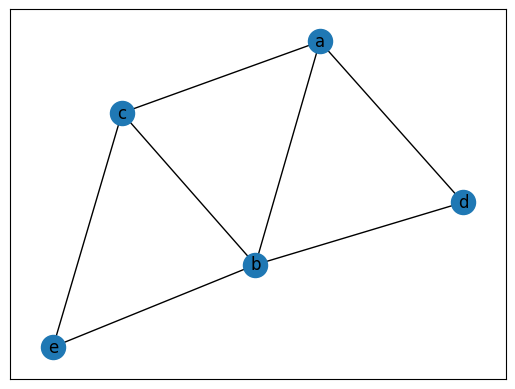

In [2]:
#Przykład użycia kodu - definiowanie grafu za pomocą vertices oraz matrix i automatyczne konwertowanie na graph_dict
vertices1 = ["a","b","c","d","e"]
matrix1 = np.array([[0,1,1,0,0],
                   [1,0,1,1,0],
                   [1,1,0,0,1],
                   [1,1,0,0,0],
                   [0,1,0,0,0]])
G1 = Graph(vertices=vertices1, matrix=matrix1)
G1.print_matrix()
G1.print_graph()

------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e', 'g', 'f']
Matrix (macierz sąsiedztwa):
 [[0 1 1 0 0 0 1]
 [1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [1 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c f 
b : a c d 
c : a b e 
d : a b 
e : b 
g : 
f : a 

------------------------------
Graf podany krawędź po krawędzi
a b
a c
a f
b a
b c
b d
c a
c b
c e
d a
d b
e b
f a
------------------------------


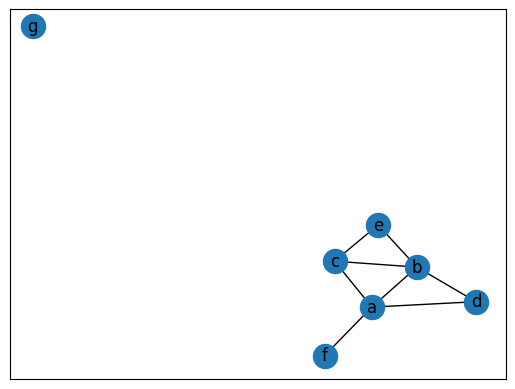

In [3]:
G1.add_vertex('g')
G1.add_edge(False, 'f','a')
G1.print_matrix()
G1.print_graph()

------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e', 'g', 'f']
Matrix (macierz sąsiedztwa):
 [[0 1 1 0 0 0 1]
 [1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [1 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c f 
b : a c d 
c : a b e 
d : a b 
e : b 
g : e 
f : a 

------------------------------
Graf podany krawędź po krawędzi
a b
a c
a f
b a
b c
b d
c a
c b
c e
d a
d b
e b
g e
f a
------------------------------


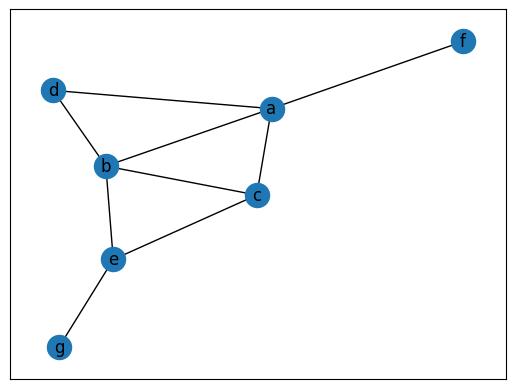

In [4]:
G1.add_edge(True, 'g','e')
G1.print_matrix()
G1.print_graph()

------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e']
Matrix (macierz sąsiedztwa):
 [[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 0 1]
 [1 1 0 0 0]
 [0 1 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c 
b : a c d 
c : a b e 
d : a b 
e : b 

------------------------------
Graf podany krawędź po krawędzi
a b
a c
b a
b c
b d
c a
c b
c e
d a
d b
e b
------------------------------


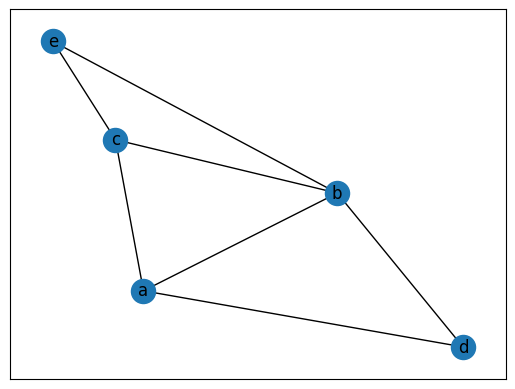

In [5]:
#Przykład użycia kodu - definiowanie grafu za pomocą graph_dict i automatyczne konwertowanie na vertices oraz matrix
graph_dict2 = {'a': ['b', 'c'],
 'b': ['a', 'c', 'd'],
 'c': ['a', 'b', 'e'],
 'd': ['a', 'b'],
 'e': ['b']}
G2 = Graph(graph_dict=graph_dict2)
G2.print_matrix()
G2.print_graph()

# Tworzenie grafów losowych $G(n,p)$

In [6]:
def random_graph(n:int,p:float,vertices:list = None):
    if n <= 0:
        raise Exception("Użytkowniku! Podana liczba n musi być dodatnia, całkowita, nie mniejsza niż 1.")
    if not 0<=p<=1:
        raise Exception("Użytkowniku! Prawdopodobieństwo p musi być z przedziału [0,1].")
    random_graph = Graph(n_to_generate=n, p_to_generate=p, generate_cycle=False, vertices=vertices)
    return random_graph

------------------------------
Vertices (wierzchołki): ['A', 'B', 'C', 'D', 'E', 'F']
Matrix (macierz sąsiedztwa):
 [[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 1 1 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
A : 
B : C 
C : B D 
D : C F 
E : F 
F : D E 

------------------------------
Graf podany krawędź po krawędzi
B C
C B
C D
D C
D F
E F
F D
F E
------------------------------


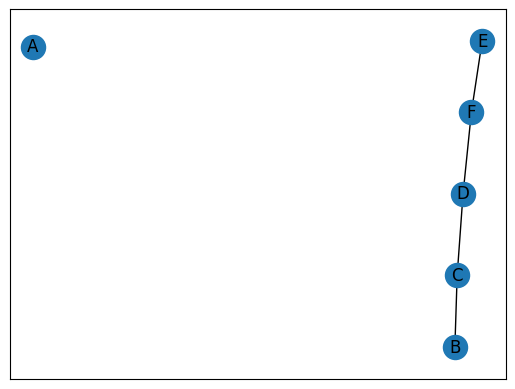

In [7]:
#Przykład użycia kodu - generowanie losowego grafu
n = 6
p = 0.25
vertices_random1 = ['A','B','C','D','E','F']
Gnp = random_graph(n,p,vertices=vertices_random1)
Gnp.print_matrix()
Gnp.print_graph()

# Tworzenie cyklu o $n$ wierzchołkach

In [8]:
def cycle(n:int, vertices:list = None):
    if n <= 2:
        raise Exception("Użytkowniku! Podana liczba n musi być dodatnia, całkowita, nie mniejsza niż 3.")
    cycle = Graph(n_to_generate=n, generate_cycle=True, vertices=vertices)
    return cycle

------------------------------
Vertices (wierzchołki): ['A', 'B', 'C', 'D', 'E', 'F']
Matrix (macierz sąsiedztwa):
 [[0 1 0 0 0 1]
 [1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
A : B F 
B : A C 
C : B D 
D : C E 
E : D F 
F : A E 

------------------------------
Graf podany krawędź po krawędzi
A B
A F
B A
B C
C B
C D
D C
D E
E D
E F
F A
F E
------------------------------


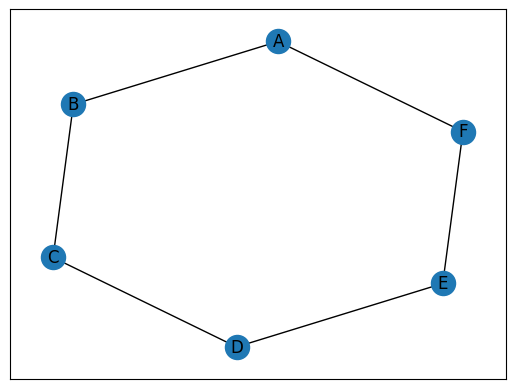

In [9]:
#Przykład użycia kodu - generowanie cyklu
n = 6
vertices_random2 = ['A','B','C','D','E', 'F']
Cn = cycle(n,vertices=vertices_random2)
Cn.print_matrix()
Cn.print_graph()

# Generowanie dwudzielnych grafów losowych 

In [10]:
def random_bipartite_graph(n: int, p: float, vertices: list = None):
    if n <= 0:
        raise Exception("Użytkowniku! Podana liczba n musi być dodatnia, całkowita, nie mniejsza niż 1.")
    if not 0 <= p <= 1:
        raise Exception("Użytkowniku! Prawdopodobieństwo p musi być z przedziału [0,1].")
    # Dla grafu bipartite potrzebujemy 2n wierzchołków
    bipartite_graph = Graph(n_to_generate=n * 2, p_to_generate=p, generate_bipartite=True, vertices=vertices)
    return bipartite_graph

------------------------------
Vertices (wierzchołki): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
Matrix (macierz sąsiedztwa):
 [[0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
A : I J 
B : F I 
C : I J 
D : G J 
E : I 
F : B 
G : D 
H : 
I : A B C E 
J : A C D 

------------------------------
Graf podany krawędź po krawędzi
A I
A J
B F
B I
C I
C J
D G
D J
E I
F B
G D
I A
I B
I C
I E
J A
J C
J D
------------------------------


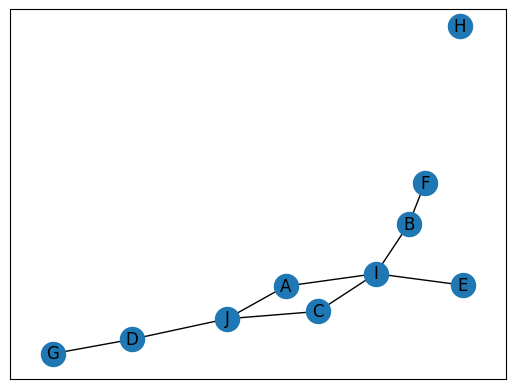

In [11]:
# Generowanie losowego grafu dwudzielnego
n = 5  # Liczba wierzchołków w jednej z części grafu
p = 0.25  # Prawdopodobieństwo połączeń między wierzchołkami w różnych częściach
vertices_bipartite = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

G_bipartite = random_bipartite_graph(n, p, vertices_bipartite)
G_bipartite.print_matrix()
G_bipartite.print_graph()

Powyższy graf nie posiada cyklu o nieparzystej długości, więc jest grafem dwudzielnym (z tw. Koniga z 1936 - ostatni slajd z wykładu 3 na WIKAMP).

# Wczytywanie grafów z pliku

In [12]:
def graph_from_edges(filename, directed = False):
    """
    Wczytuje graf z pliku tekstowego, gdzie podany jest opis krawędzi (dwa słowa)
    lub wierzchołka (jedno słowo).
    Wynik podany jest w formie obiektu Graph.
    Zmienna filename zawiera pełną (bezwzględną) ścieżkę do pliku.
    """
    graph = Graph(generate=False)
    with open(filename, "r") as file:  # otwarcie pliku do odczytu
        for line in file:
            words = line.strip().split() # podział linii na słowa
            if len(words) == 1:
                graph.add_vertex(words[0])
            elif len(words) >= 2:
                graph.add_edge(directed, words[0], words[1])
    return graph

In [13]:
%%writefile graph1.txt
a b
a c
a d
c e
f

Overwriting graph1.txt


------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e', 'f']
Matrix (macierz sąsiedztwa):
 [[0 1 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c d 
b : 
c : e 
d : 
e : 
f : 

------------------------------
Graf podany krawędź po krawędzi
a b
a c
a d
c e
------------------------------


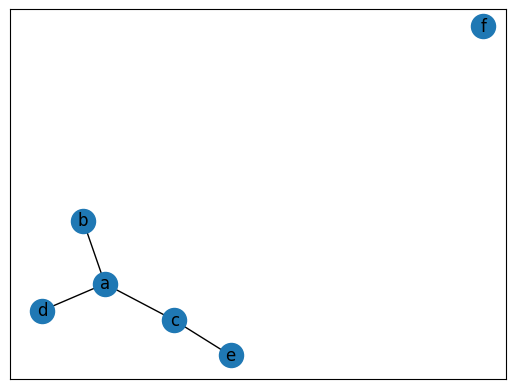

In [14]:
graph1_directed = graph_from_edges('graph1.txt', directed=True)
graph1_directed.print_matrix()
graph1_directed.print_graph()

------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e', 'f']
Matrix (macierz sąsiedztwa):
 [[0 1 1 1 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c d 
b : a 
c : a e 
d : a 
e : c 
f : 

------------------------------
Graf podany krawędź po krawędzi
a b
a c
a d
b a
c a
c e
d a
e c
------------------------------


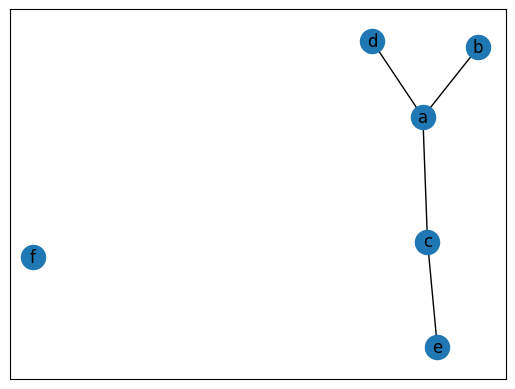

In [15]:
graph1_not_directed = graph_from_edges('graph1.txt', directed=False)
graph1_not_directed.print_matrix()
graph1_not_directed.print_graph()

In [16]:
def graph_from_neighbourlist(filename, directed = False):
    """
    Wczytuje graf z pliku tekstowego, gdzie podana jest lista sąsiedztwa w postaci wierzchołek: (sąsiedzi oddzieleni spacją)
    Wynik podany jest w formie obiektu typu Graph.
    Zmienna filename zawiera pełną (bezwzględną) ścieżkę do pliku.
    """
    graph = Graph(generate=False)
    with open(filename, "r") as file:  # otwarcie pliku do odczytu
        for line in file:
            words = line.strip().split() # podział linii na słowa
            vertex = words[0]
            graph.add_vertex(vertex=vertex)
            neighbours = words[2:]
            for neighbour in neighbours:
                graph.add_edge(directed, vertex, neighbour)
    return graph

In [17]:
%%writefile graph2.txt
1 : 2 5 
2 : 1 3 
3 : 2 4 
4 : 3 5 
5 : 1 4

Overwriting graph2.txt


------------------------------
Vertices (wierzchołki): ['1', '2', '5', '3', '4']
Matrix (macierz sąsiedztwa):
 [[0 1 1 0 0]
 [1 0 0 1 0]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [0 0 1 1 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
1 : 2 5 
2 : 1 3 
5 : 1 4 
3 : 2 4 
4 : 3 5 

------------------------------
Graf podany krawędź po krawędzi
1 2
1 5
2 1
2 3
5 1
5 4
3 2
3 4
4 3
4 5
------------------------------


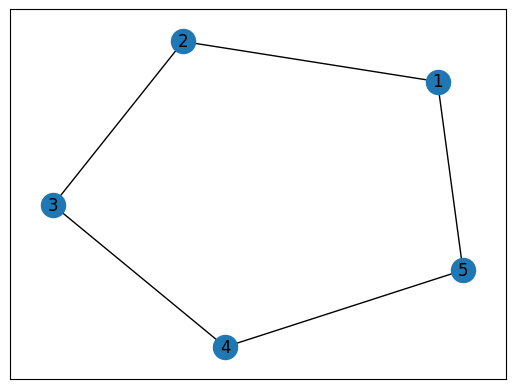

In [18]:
graph2_directed = graph_from_neighbourlist(filename='graph2.txt', directed=True)
graph2_directed.print_matrix()
graph2_directed.print_graph()

------------------------------
Vertices (wierzchołki): ['1', '2', '5', '3', '4']
Matrix (macierz sąsiedztwa):
 [[0 1 1 0 0]
 [1 0 0 1 0]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [0 0 1 1 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
1 : 2 5 
2 : 1 3 
5 : 1 4 
3 : 2 4 
4 : 3 5 

------------------------------
Graf podany krawędź po krawędzi
1 2
1 5
2 1
2 3
5 1
5 4
3 2
3 4
4 3
4 5
------------------------------


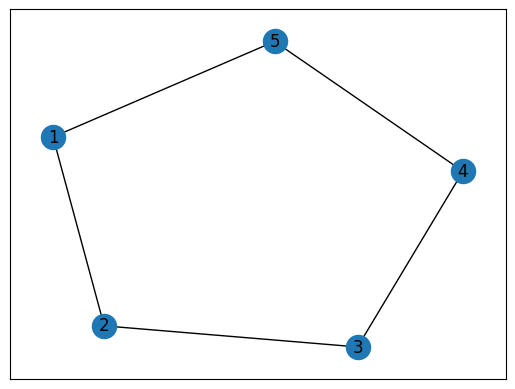

In [19]:
graph2_not_directed = graph_from_neighbourlist(filename='graph2.txt', directed=False)
graph2_not_directed.print_matrix()
graph2_not_directed.print_graph()

# Zapisywanie grafów do pliku

------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c d 
b : 
c : e 
d : 
e : 
f : 

------------------------------
Graf podany krawędź po krawędzi
a b
a c
a d
c e
------------------------------


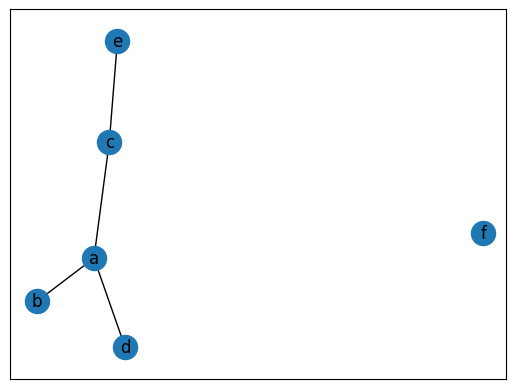

In [20]:
graph1_directed.print_graph()

In [21]:
graph1_directed.save_graph_as_adjacency_list('graph1_directed_adjacency_list.txt') #zapis jako lista sąsiedztwa

Próba ponownego odczytania - czy się pokryje?

------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e', 'f']
Matrix (macierz sąsiedztwa):
 [[0 1 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c d 
b : 
c : e 
d : 
e : 
f : 

------------------------------
Graf podany krawędź po krawędzi
a b
a c
a d
c e
------------------------------


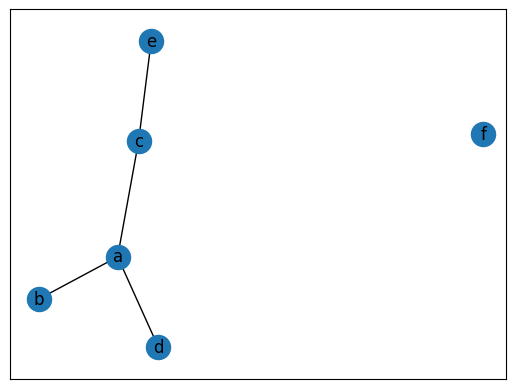

In [22]:
graph1_directed_fromfile = graph_from_neighbourlist(filename='graph1_directed_adjacency_list.txt', directed=True)
graph1_directed_fromfile.print_matrix()
graph1_directed_fromfile.print_graph() #zgadza się, jest to samo

In [23]:
graph1_directed.save_graph_as_edge_list('graph1_directed_edge_list.txt') #zapis jako lista sąsiedztwa

------------------------------
Vertices (wierzchołki): ['a', 'b', 'c', 'd', 'e']
Matrix (macierz sąsiedztwa):
 [[0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]
------------------------------
------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
a : b c d 
b : 
c : e 
d : 
e : 

------------------------------
Graf podany krawędź po krawędzi
a b
a c
a d
c e
------------------------------


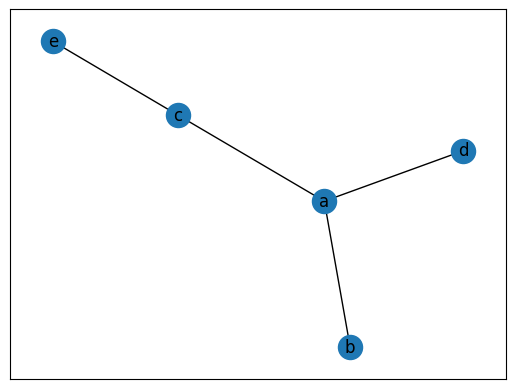

In [24]:
graph1_directed_fromfile_edges = graph_from_edges(filename='graph1_directed_edge_list.txt', directed=True)
graph1_directed_fromfile_edges.print_matrix()
graph1_directed_fromfile_edges.print_graph() #zgadza się, jest to samo

# Klasa Graph - implementacja z zajęć

In [25]:
import numpy as np
from random import random, seed
from copy import deepcopy

def print_matrix(vertices, matrix):
  """
  Printing a graph given by adjacency matrix
  """
  n = len(matrix)
  if (vertices is not None) and (len(vertices) == n):
    vv = vertices
  else:
    vv = range(1, n+1)
  for i in range(n):
    print(vv[i], ":", end="")
    for j in range(n):
      if matrix[i, j]:
        print(" ", vv[j], end="")
    print("")

def print_dict(graph):
  """
  Printing of a graph (given as a dictionary/neighbouring list)
  """
  for v in graph:
    print(v, ":", end="")
    for u in graph[v]:
      print(" ", u, end="")
    print("")

class GraphTutorial:
    def __init__(self, graph=None):
        if graph is None:
            graph = {}
        self.graph = graph

    # dict initializer
    @classmethod
    def from_dict(cls, graph):
        return cls(graph)

    # array initializer
    @classmethod
    def from_matrix(cls, matrix, vertices = None):
        if (vertices is None) or (len(vertices) != len(matrix)):
            vertices = [*range(1, len(matrix) + 1)]
        return cls.from_dict(cls._matrix_to_dict(matrix, vertices))

    # two private methods matrix <-> dictionaries
    def _matrix_to_dict(matrix, vertices: list) -> dict:
        """
        Converts a graph given as an adjacency matrix to a graph in dict form.
        """
        res_dict = {}
        for i, v in enumerate(vertices):
            neighbours = [vertices[j] for j, edge in enumerate(matrix[i]) if edge]
            res_dict[v] = neighbours
        return res_dict

    def _dict_to_matrix(self, _dict: dict) -> np.array:
        """
        Converts a graph in dict form to its adjacency matrix.
        """
        n = len(_dict)
        vertices = [*_dict.keys()]
        matrix = np.zeros(shape = (n, n), dtype=int)
        for u,v in [
            (vertices.index(u), vertices.index(v))
            for u, row in _dict.items() for v in row
        ]:
            matrix[u][v] += 1
        return matrix

    def vertices(self) -> list:
        """
        Returns list of vertices of the graph.
        """
        return [*self.graph.keys()]

    def matrix(self) -> np.array:
        """
        Returns the adjacency matrix of the graph.
        """
        return self._dict_to_matrix(self.graph)

    # redefinition of print for objects of class GraphTutorial
    def __str__(self):
        res = ""
        for v in self.graph:
            res += f"{v}:"
            for u in self.graph[v]:
                res += f" {u}"
            res += "\n"
        return res

    # The following is for free thanks to the above
    def to_neighbourlist(self, filename: str):
        """
        Saves a graphs to a text file as a neighbour dict.\n
        Filename is a file path.
        """
        file = open(filename, "w")  # open textfile for writing
        file.write(str(self))
        file.close()

    # Modyfying graphs
    def add_vertex(self, vertex):
        """
        Adds a new vertex to the graph.
        """
        if vertex not in self.graph:
            self.graph[vertex] = []

    def del_vertex(self, vertex):
        """
        Removes a vertex from the graph.
        """
        if vertex in self.graph:
            self.graph.pop(vertex)
            for u in self.graph:
                if vertex in self.graph[u]:
                    self.graph[u].remove(vertex)

    def add_arc(self, arc):
        """
        Given pair of vertices (arc variable) add an arc to the graph
        We consider simple, directed graphs.
        """
        u, v = arc
        self.add_vertex(u)
        self.add_vertex(v)
        if v not in self.graph[u]:
            self.graph[u].append(v)

    def add_edge(self, edge: list):
        """
        Given pair of vertices (edge variable) add an edge to existing graph.
        We consider simple, undirected graphs, as symmetric digraphs without loops.
        """
        u, v = edge
        if u == v:
            raise ValueError("Loops are not allowed!")
        self.add_vertex(u)
        self.add_vertex(v)
        if v not in self.graph[u]:
            self.graph[u].append(v)
        if u not in self.graph[v]:
            self.graph[v].append(u)

    # reading from a file
    @staticmethod
    def from_edges(filename: str, directed = 0):
        """
        Read the graph from file, that in each line contains either
        the description of a vertex (one word) or
        the description of an edge/arc (at least 2 words).
        The resulting graph is returned as a neighbourhood list.
        Variable "filename" contains the whole path to the file.
        """
        graph = GraphTutorial()
        file = open(filename, "r")          # open the file to read
        for line in file:                   # for each line of the file
          words = line.strip().split()      # splits the line into words
          if len(words) == 1:               # one word - vertex description
            graph.add_vertex(words[0])
          elif len(words) >= 2:             # at least two words, first two are the edge description
            if directed:
              graph.add_arc([words[0], words[1]])
            else:
              graph.add_edge([words[0], words[1]])
        file.close()
        return graph

    @staticmethod
    def random_graph(n: int, p: float):
        """
        Creates a random graph in G(n, p) model.
        """
        rand_graph = GraphTutorial()
        for i in range(1, n + 1):
            rand_graph.add_vertex(i)
            for j in range(1, i):
                if random() < p:
                    rand_graph.add_edge([i, j])
        return rand_graph

    @staticmethod
    def cycle(n: int):
        """
        Creates a cycle C_n on n vertices
        """
        cycle = GraphTutorial()
        for i in range(n-1):
          cycle.add_edge([i+1, i+2])
        cycle.add_edge([1, n])
        return cycle

    # def Prufer(self):                                                     #stara metoda Prufer - wywalało błąd
    #   """
    #   Returns the Prufer code of a tree.
    #   It is necessary that the graph is a tree (it is not checked).
    #   Result is given as a string (empty for trees on 1 or 2 vertices).
    #   """
    #   tr = deepcopy(self.graph)   # copy of a tree, as we destroy it
    #   code = ""
    #   for i in range(len(self.graph) - 2):
    #     for x in sorted(tr):
    #       if len(tr[x]) == 1:   # least leaf
    #         break
    #     v = tr[x][0]            # the unique neighbour of x
    #     code = code + f"{v} "
    #     tr[v].remove(x)         # remove x from neighbours of v               #przez to wywalało błąd: x not in list
    #     tr.pop(x)               # remove x from the tree
    #   return code.strip()

    def Prufer(self):
        """
        Returns the Prufer code of a tree.
        It is necessary that the graph is a tree (it is not checked).
        Result is given as a string (empty for trees on 1 or 2 vertices).
        """
        tr = deepcopy(self.graph)   # copy of a tree, as we destroy it
        code = ""
        for i in range(len(self.graph) - 2):
            for x in sorted(tr):
                if len(tr[x]) == 1:   # least leaf
                    break
            v = tr[x][0]            # the unique neighbour of x
            code += f"{v} "
            if x in tr[v]:          # dodane zabezpieczenie
                tr[v].remove(x)
            tr.pop(x)               # remove x from the tree
        return code.strip()
    
    @staticmethod
    def tree_from_Prufer_vertices_int(code: str):                   #wcześniej ta metoda była pod nazwą: tree_from_Prufer
        """
        Creating a tree from a Prufer code.
        """
        tree = GraphTutorial()
        clist = [int(x) for x in code.strip().split()]   # code as a list of numbers
        n = len(clist) + 2                  # number of vertices
        vert = [*range(1, n+1)]             # list of numbers 1..n
        for v in vert:
          tree.add_vertex(v)
        for i in range(n-2):
          for x in vert:
            if not x in clist:    # x - least leaf
              break
          v = clist.pop(0)    # remove the first element from the code - the neighbour of x
          tree.add_edge((x, v))
          vert.remove(x)
        tree.add_edge(vert)
        return tree

# Kody Prüfera - testy własne

Weźmy sobie przykład drzewa z wikipedii - link: https://en.wikipedia.org/wiki/Tree_traversal

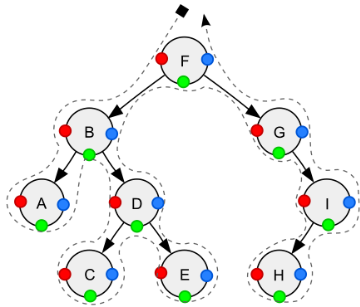

Zapisujemy powyższe drzewo za pomocą macierzy:

In [26]:
matrix_tree_wiki = np.array([
    # A  B  C  D  E  F  G  H  I
    [0, 1, 0, 0, 0, 0, 0, 0, 0],  # A
    [1, 0, 0, 1, 0, 1, 0, 0, 0],  # B
    [0, 0, 0, 1, 0, 0, 0, 0, 0],  # C
    [0, 1, 1, 0, 1, 0, 0, 0, 0],  # D
    [0, 0, 0, 1, 0, 0, 0, 0, 0],  # E
    [0, 1, 0, 0, 0, 0, 1, 0, 0],  # F
    [0, 0, 0, 0, 0, 1, 0, 0, 1],  # G
    [0, 0, 0, 0, 0, 0, 0, 0, 1],  # H
    [0, 0, 0, 0, 0, 0, 1, 1, 0]   # I
])
matrix_tree_wiki

array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0]])

Sprawdźmy, jaki kod Prufera ma to drzewo - jego wierzchołki to litery:

In [27]:
[chr(64+i) for i in range(1,10)]

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

Możemy też wierzchołki zapisać jako liczby:

In [28]:
[i for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
wiki_tree_to_prufer_vertices_int = GraphTutorial.from_matrix(matrix=matrix_tree_wiki,vertices=[i for i in range(1,10)]) #w tym celu skorzystamy z klasy napisanej na zajęciach, którą u siebie nazwałem GraphTutorial

In [30]:
wiki_prufer_code_vertices_int = wiki_tree_to_prufer_vertices_int.Prufer()
print("Kod Prüfera:", wiki_prufer_code_vertices_int)

Kod Prüfera: 2 4 4 2 6 7 9


Sprawdźmy, czy macierz drzewa wygenerowanego z tego kodu będzie się pokrywała z wyjściową macierzą:

In [31]:
wiki_matrix_from_prufer_vertices_int = GraphTutorial.tree_from_Prufer_vertices_int(wiki_prufer_code_vertices_int).matrix()
wiki_matrix_from_prufer_vertices_int

array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0]])

In [32]:
#Czy to jest to samo, co było wcześniej?
np.allclose(wiki_matrix_from_prufer_vertices_int,matrix_tree_wiki)

True

# Przechodzenie po grafach

Spróbujemy zaimplementować metody pre-order, post-order oraz in-order i przetestować je na przykładzie z wikipedii - link: https://en.wikipedia.org/wiki/Tree_traversal

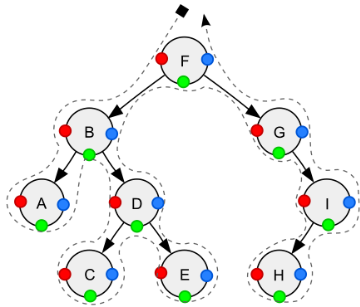

Tworzę obiekt grafu (z mojej klasy, aby narysować powyższe drzewo za pomocą mojej metody).

------------------------------
Dla każdego wierzchołka, lista jego sąsiadów:
A : B 
B : A D F 
C : D 
D : B C E 
E : D 
F : B G 
G : F I 
H : I 
I : G H 

------------------------------
Graf podany krawędź po krawędzi
A B
B A
B D
B F
C D
D B
D C
D E
E D
F B
F G
G F
G I
H I
I G
I H
------------------------------


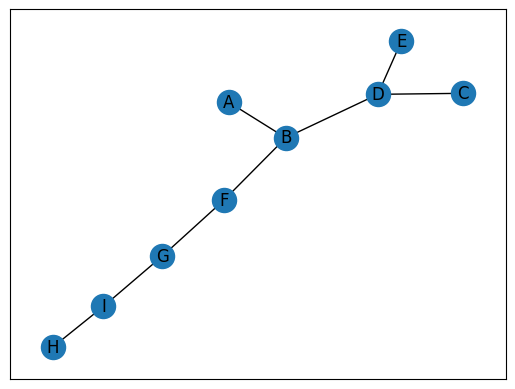

In [33]:
my_graph_test = Graph(matrix=matrix_tree_wiki,vertices=['A','B','C','D','E','F','G','H','I'])
my_graph_test.print_graph()

Może tego nie widać na pierwszy rzut oka, ale te rysunki się pokrywają. Tylko że póki co, u mnie nie jest to narysowane tak przejrzyście i nie ma strzałek schodzących w dół.

Do algorytmów, które wypisują kolejność podróżowania po grafie potrzebna jest następująca klasa TreeNode:

In [34]:
class TreeNode:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
    def __str__(self):
        return str(self.val)

Teraz tworzę obiekty wierzchołków dla powyższego drzewa oraz (ręcznie) dokonuję przypisania, co to znaczy "lewo", a co "prawo" dla każdego wierzchołka.

In [35]:
treenodes = list()
for i in range(1,10):
    treenodes.append(TreeNode(chr(64+i)))
    print("{}: na liście indeks {}".format(treenodes[i-1],i-1))

A: na liście indeks 0
B: na liście indeks 1
C: na liście indeks 2
D: na liście indeks 3
E: na liście indeks 4
F: na liście indeks 5
G: na liście indeks 6
H: na liście indeks 7
I: na liście indeks 8


In [36]:
#Dodajemy sąsiadów
treenodes[5].left = treenodes[1] #lewym sąsiadem dla F jest B
treenodes[5].right = treenodes[6] #prawym sąsiadem dla F jest G

#główne lewe poddrzewo

treenodes[1].left = treenodes[0] #lewym sąsiadem dla B jest A
treenodes[1].right = treenodes[3] #prawym sąsiadem dla B jest D
#prawe poddrzewo w głównym lewym poddrzewie
treenodes[3].left = treenodes[2] #lewym sąsiadem dla D jest C
treenodes[3].right = treenodes[4] #prawym sąsiadem dla D jest E

#prawe główne poddrzewo

treenodes[6].right = treenodes[8] #prawym sąsiadem dla G jest I
treenodes[8].left = treenodes[7] #lewym sąsiadem dla I jest H

## Porządek Pre-order

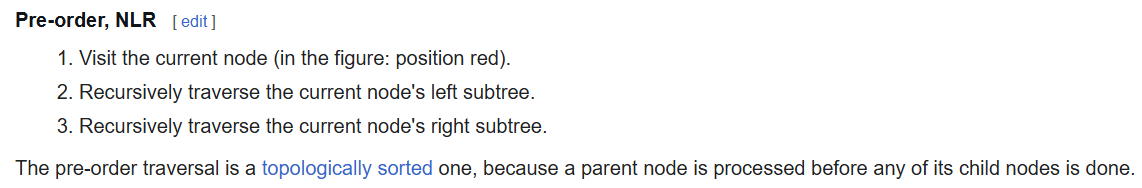

In [37]:
def preorderTraversal(root: TreeNode):
    cur, stack = root, []  # Ustawiamy 'cur' jako bieżący węzeł, a 'stack' jako pusty stos
    res = []  # Lista wynikowa, w której będą przechowywane odwiedzone węzły
    while cur is not None or stack:  # Pętla działa dopóki istnieje bieżący węzeł lub stos nie jest pusty
        if cur is not None: #Sprawdzamy, czy biężacy węzeł istnieje
            res.append(cur.val)  # Odwiedzamy bieżący węzeł i dodajemy jego wartość do wyniku
            stack.append(cur.right)  # Dodajemy prawe dziecko bieżącego węzła na stos
            cur = cur.left  # Przechodzimy do lewego dziecka bieżącego węzła
        else:
            cur = stack.pop()  # Gdy brak bieżącego węzła, pobieramy węzeł ze stosu (powrót do prawego dziecka)
    return ", ".join(res)  # Zwracamy listę z kolejnością odwiedzania węzłów

In [38]:
preorderTraversal(root=treenodes[5]) #zaczynamy od wierzchołka F

'F, B, A, D, C, E, G, I, H'

Zgadza się z wiki!

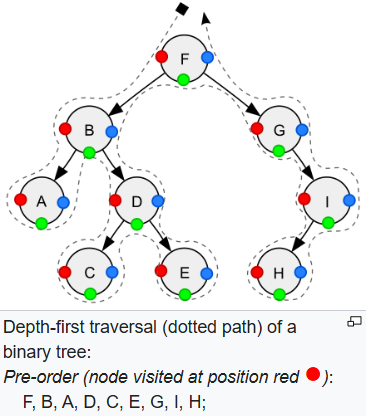

In [39]:
preorderTraversal(root=treenodes[1]) #zaczynamy od wierzchołka B

'B, A, D, C, E'

## Porządek In-order

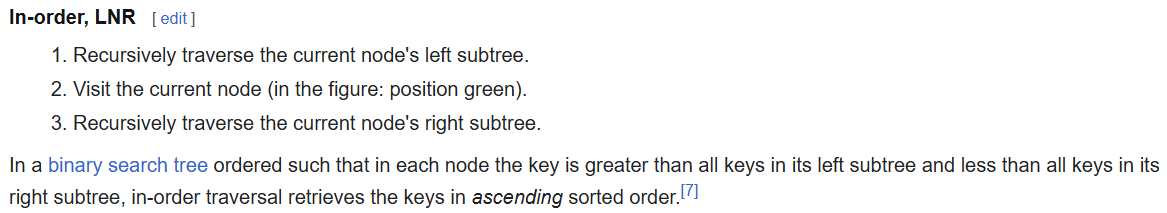

In [40]:
def inorderTraversal(root: TreeNode):
    cur = root  # Ustawiamy 'cur' jako korzeń drzewa
    stack = []  # Inicjalizujemy pusty stos do przechowywania węzłów
    res = []  # Lista wynikowa, w której zapiszemy odwiedzone wartości węzłów
    
    while cur is not None or stack:  # Pętla działa dopóki mamy bieżący węzeł lub stos nie jest pusty
        # Idziemy w lewo, aż nie będzie już lewego dziecka
        while cur is not None:
            stack.append(cur)  # Dodajemy bieżący węzeł na stos
            cur = cur.left  # Przechodzimy do lewego dziecka bieżącego węzła
        # Pobieramy ostatni element ze stosu, to jest nasz węzeł z najniższą etykietą
        cur = stack.pop()
        res.append(cur.val)  # Odwiedzamy węzeł, dodając jego wartość do wyniku
        # Następnie przechodzimy do prawego dziecka
        cur = cur.right
    return ', '.join(res)  # Zwracamy listę z kolejnością odwiedzania węzłów (in-order)

In [41]:
inorderTraversal(root=treenodes[5]) #zaczynamy od wierzchołka F

'A, B, C, D, E, F, G, H, I'

Zgadza się z wiki!

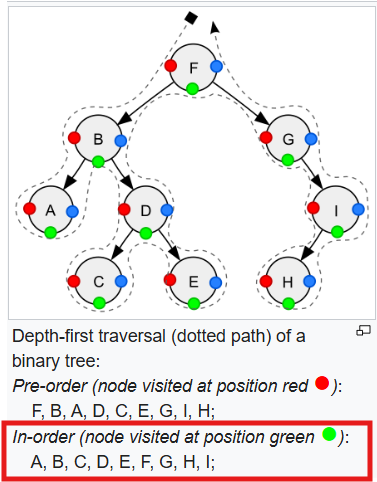

In [42]:
inorderTraversal(root=treenodes[1]) #zaczynamy od wierzchołka B

'A, B, C, D, E'

## Porządek Post-order

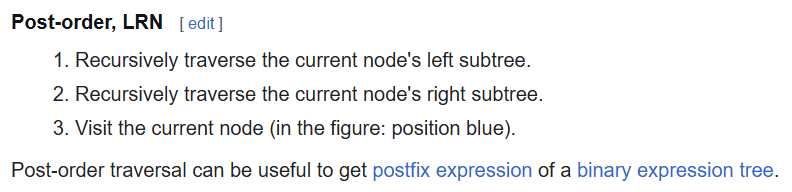

In [43]:
def postorderTraversal(root: TreeNode):
    stack = [root]  # Inicjalizujemy stos z korzeniem drzewa
    visit = [False]  # Stos flag, który śledzi, czy węzeł został już odwiedzony (False - nieodwiedzony, True - odwiedzony)
    res = []  # Lista wynikowa, w której będziemy zapisywać wartości węzłów

    while stack:  # Pętla wykonuje się dopóki stos nie jest pusty
        cur, v = stack.pop(), visit.pop()  # Pobieramy bieżący węzeł oraz odpowiadającą mu flagę (domyślnie pobieramy ostatni element ze stosu: zasada last in, first out)
        if cur is not None:  # Sprawdzamy, czy bieżący węzeł nie jest None
            if v:  # Jeśli flaga jest True, oznacza to, że węzeł został już wcześniej "odwiedzony"
                res.append(cur.val)  # Dodajemy wartość węzła do listy wynikowej
            else:
                # Jeśli flaga jest False, to:
                # 1. Odkładamy bieżący węzeł na stos z flagą True (aby odwiedzić go po lewym i prawym poddrzewie)
                stack.append(cur)
                visit.append(True)
                # 2. Dodajemy prawe dziecko na stos z flagą False
                stack.append(cur.right)
                visit.append(False)
                # 3. Dodajemy lewe dziecko na stos z flagą False
                stack.append(cur.left)
                visit.append(False)  # Dodajemy flagę dla lewego dziecka
    return ", ".join(res)  # Zwracamy listę z kolejnością odwiedzania węzłów

In [44]:
postorderTraversal(root=treenodes[5]) #zaczynamy od wierzchołka F

'A, C, E, D, B, H, I, G, F'

Zgadza się z wiki!

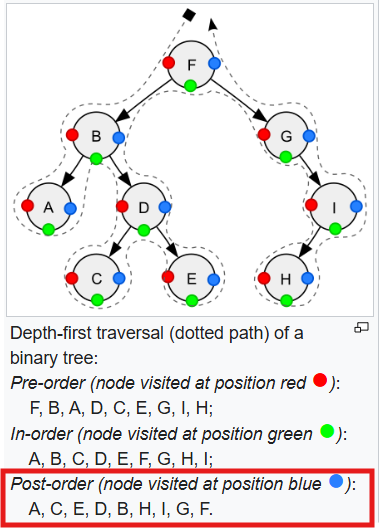

In [45]:
postorderTraversal(root=treenodes[1]) #zaczynamy od wierzchołka B

'A, C, E, D, B'

# Przeszukiwanie grafów

## Krótkie porównanie deque vs PriorityQueue

1. collections.deque

Dwukierunkowa kolejka (double-ended queue). Umożliwia efektywne dodawanie i usuwanie elementów zarówno z lewej, jak i z prawej strony.

Podstawowe operacje

append(x) — dodaje x na prawy koniec.

appendleft(x) — dodaje x na lewy koniec.

pop() — usuwa i zwraca element z prawego końca.

popleft() — usuwa i zwraca element z lewego końca.

extend(iterable) / extendleft(iterable) — dodawanie wielu elementów.

Złożoność

Wszystkie powyższe operacje są amortyzowane O(1). Tzn większość operacji ma stały koszt, ale niektóre są droższe bo struktura ta może od czasu do czasu przydzielać większy bufor pamięci, aby pomieścić więcej danych (czyli np. przeskalować się), jednak średnio i tak wychodzi O(1). Dzięki temu deque jest świetna do implementacji kolejek FIFO i stosów LIFO oraz struktur, gdzie potrzebny jest szybki dostęp po obu końcach.

Właściwości

Nieograniczona długość (dopóki system ma pamięć).

Brak automatycznego sortowania czy priorytetyzacji.

Nie jest wbudowanie bezpieczna wątkowo (thread-unsafe), tzn. może dojść do błędów lub uszkodzenia danych (ang. race conditions, data corruption, unexpected behavior), ponieważ deque nie chroni się automatycznie przed dostępem z wielu wątków, ale można ją używać za pomocą mechanizmów synchronizacji, jeśli trzeba. 

2. queue.PriorityQueue — kolejka priorytetowa (FIFO z priorytetami)

To specjalna kolejka, w której elementy są pobierane według priorytetu, a nie według kolejności dodania.

Jak to działa?
Każdy element ma przypisany priorytet (zwykle liczba).

Element z najmniejszym priorytetem (najniższą liczbą) jest wyjmowany jako pierwszy.

Jeśli dwa elementy mają ten sam priorytet, kolejność może być:

taka jak przy dodawaniu (FIFO), albo

arbitralna (zależy od implementacji i typu danych).

W praktyce dodaje się do kolejki krotki:
(priorytet, element)
np. pq.put((1, "ważne zadanie"))

Najważniejsze operacje:

put(item) — dodaje element (z priorytetem) do kolejki.

get() — wyjmuje element o najwyższym priorytecie (czyli najniższej wartości liczbowej).

Obie operacje mają złożoność O(log n), bo wewnętrznie działa sterta (heap).

Dodatkowe cechy:
Bezpieczna w środowisku wielowątkowym (thread-safe) —
kolejka sama dba o synchronizację między wątkami, więc można bezpiecznie używać jej do komunikacji między wątkami.

Trzeba samodzielnie określać priorytet, np. przez liczby całkowite.

3. Podobieństwa i różnice

Cecha	                            deque	                            PriorityQueue

Kolejka FIFO	                    Tak, przez append/popleft	        Tylko gdy wszystkie priorytety równe

Priorytety	                        Brak	                            Tak, elementy sortowane po priorytecie

Złożoność operacji	                O(1) amortyzowane	                O(log n)

Dostęp do obu końców	            Tak	                                Nie (tylko usuwanie najwyższego priorytetu)

Bezpieczeństwo wątkowe	            Nie (trzeba zewnętrznej blokady)	Tak (wbudowane blokady)

Przeznaczenie	                    FIFO, LIFO, dwustronna kolejka	    Kolejka priorytetowa (scheduler)

4. Podsumowanie

deque to lekka i szybka struktura danych, idealna do tworzenia kolejek i stosów, zwłaszcza gdy potrzebujemy szybkiego dostępu do obu końców (dodawanie i usuwanie elementów z początku i końca).

PriorityQueue służy do obsługi zadań o różnym stopniu ważności — pozwala przetwarzać elementy według ich priorytetów. Jest bezpieczna w środowisku wielowątkowym, co czyni ją odpowiednią do komunikacji między wątkami.

Wybór między nimi zależy głównie od tego, czy potrzebujemy:

sortowania elementów według priorytetu (PriorityQueue),

czy szybkiego dostępu z obu końców kolejki (deque),

i czy wymagana jest synchronizacja między wątkami (PriorityQueue).

## Kod z zajęć i dodany mój z pracy domowej

Kod z zajęć z pliku Grafy6.ipynb:

In [46]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import random, seed
from copy import deepcopy

In [47]:
def print_matrix(vertices, matrix):
  """
  Printing a graph given by adjacency matrix
  """
  n = len(matrix)
  if (vertices is not None) and (len(vertices) == n):
    vv = vertices
  else:
    vv = range(1, n+1)
  for i in range(n):
    print(vv[i], ":", end="")
    for j in range(n):
      if matrix[i, j]:
        print(" ", vv[j], end="")
    print("")

def print_dict(graph):
  """
  Printing of a graph (given as a dictionary/neighbouring list)
  """
  for v in graph:
    print(v, ":", end="")
    for u in graph[v]:
      print(" ", u, end="")
    print("")

In [48]:
from collections import deque

class Graph:
    def __init__(self, graph=None):
        if graph is None:
            graph = {}
        self.graph = graph

    # dict initializer
    @classmethod
    def from_dict(cls, graph):
        return cls(graph)

    # array initializer
    @classmethod
    def from_matrix(cls, matrix, vertices = None):
        if (vertices is None) or (len(vertices) != len(matrix)):
            vertices = [*range(1, len(matrix) + 1)]
        return cls.from_dict(cls._matrix_to_dict(matrix, vertices))

    # two private methods matrix <-> dictionaries
    def _matrix_to_dict(matrix, vertices: list) -> dict:
        """
        Converts a graph given as an adjacency matrix to a graph in dict form.
        """
        res_dict = {}
        for i, v in enumerate(vertices):
            neighbours = [vertices[j] for j, edge in enumerate(matrix[i]) if edge]
            res_dict[v] = neighbours
        return res_dict

    def _dict_to_matrix(self, _dict: dict) -> np.array:
        """
        Converts a graph in dict form to its adjacency matrix.
        """
        n = len(_dict)
        vertices = [*_dict.keys()]
        matrix = np.zeros(shape = (n, n), dtype=int)
        for u,v in [
            (vertices.index(u), vertices.index(v))
            for u, row in _dict.items() for v in row
        ]:
            matrix[u][v] += 1
        return matrix

    def vertices(self) -> list:
        """
        Returns list of vertices of the graph.
        """
        return [*self.graph.keys()]

    def matrix(self) -> np.array:
        """
        Returns the adjacency matrix of the graph.
        """
        return self._dict_to_matrix(self.graph)

    # redefinition of print for objects of class Graph
    def __str__(self):
        res = ""
        for v in self.graph:
            res += f"{v}:"
            for u in self.graph[v]:
                res += f" {u}"
            res += "\n"
        return res

    # The following is for free thanks to the above
    def to_neighbourlist(self, filename: str):
        """
        Saves a graphs to a text file as a neighbour dict.\n
        Filename is a file path.
        """
        file = open(filename, "w")  # open textfile for writing
        file.write(str(self))
        file.close()

    # Modyfying graphs
    def add_vertex(self, vertex):
        """
        Adds a new vertex to the graph.
        """
        if vertex not in self.graph:
            self.graph[vertex] = []

    def del_vertex(self, vertex):
        """
        Removes a vertex from the graph.
        """
        if vertex in self.graph:
            self.graph.pop(vertex)
            for u in self.graph:
                if vertex in self.graph[u]:
                    self.graph[u].remove(vertex)

    def add_arc(self, arc):
        """
        Given pair of vertices (arc variable) add an arc to the graph
        We consider simple, directed graphs.
        """
        u, v = arc
        self.add_vertex(u)
        self.add_vertex(v)
        if v not in self.graph[u]:
            self.graph[u].append(v)

    def add_edge(self, edge: list):
        """
        Given pair of vertices (edge variable) add an edge to existing graph.
        We consider simple, undirected graphs, as symmetric digraphs without loops.
        """
        u, v = edge
        if u == v:
            raise ValueError("Loops are not allowed!")
        self.add_vertex(u)
        self.add_vertex(v)
        if v not in self.graph[u]:
            self.graph[u].append(v)
        if u not in self.graph[v]:
            self.graph[v].append(u)

    # reading from a file
    @staticmethod
    def from_edges(filename: str, directed = 0):
        """
        Read the graph from file, that in each line contains either
        the description of a vertex (one word) or
        the description of an edge/arc (at least 2 words).
        The resulting graph is returned as a neighbourhood list.
        Variable "filename" contains the whole path to the file.
        """
        graph = Graph()
        file = open(filename, "r")          # open the file to read
        for line in file:                   # for each line of the file
          words = line.strip().split()      # splits the line into words
          if len(words) == 1:               # one word - vertex description
            graph.add_vertex(words[0])
          elif len(words) >= 2:             # at least two words, first two are the edge description
            if directed:
              graph.add_arc([words[0], words[1]])
            else:
              graph.add_edge([words[0], words[1]])
        file.close()
        return graph

    @staticmethod
    def random_graph(n: int, p: float):
        """
        Creates a random graph in G(n, p) model.
        """
        rand_graph = Graph()
        for i in range(1, n + 1):
            rand_graph.add_vertex(i)
            for j in range(1, i):
                if random() < p:
                    rand_graph.add_edge([i, j])
        return rand_graph

    @staticmethod
    def cycle(n: int):
        """
        Creates a cycle C_n on n vertices
        """
        cycle = Graph()
        for i in range(n-1):
          cycle.add_edge([i+1, i+2])
        cycle.add_edge([1, n])
        return cycle

    def draw(self):
      """
      Draws the graph using networkx.
      """
      G = nx.Graph()
      for u in self.graph:
        for v in self.graph[u]:
          G.add_edge(u, v)
      pos = nx.spring_layout(G)
      nx.draw(G, pos, with_labels=True)
      plt.show()

    def Prufer(self):
      """
      Returns the Prufer code of a tree.
      It is necessary that the graph is a tree (it is not checked).
      Result is given as a string (empty for trees on 1 or 2 vertices).
      """
      tr = deepcopy(self.graph)   # copy of a tree, as we destroy it
      code = ""
      for i in range(len(self.graph) - 2):
        for x in sorted(tr):
          if len(tr[x]) == 1:   # least leaf
            break
        v = tr[x][0]            # the unique neighbour of x
        code = code + f"{v} "
        tr[v].remove(x)         # remove x from neighbours of v
        tr.pop(x)               # remove x from the tree
      return code.strip()

    @staticmethod
    def tree_from_Prufer(code: str):
        """
        Creating a tree from a Prufer code.
        """
        tree = Graph()
        clist = [int(x) for x in code.strip().split()]   # code as a list of numbers
        n = len(clist) + 2                  # number of vertices
        vert = [*range(1, n+1)]             # list of numbers 1..n
        for v in vert:
          tree.add_vertex(v)
        for i in range(n-2):
          for x in vert:
            if not x in clist:    # x - least leaf
              break
          v = clist.pop(0)    # remove the first element from the code - the neighbour of x
          tree.add_edge((x, v))
          vert.remove(x)
        tree.add_edge(vert)
        #Nie lepiej byłoby: tree.add_edge([vert[0], vert[1]])?
        return tree

    def connected_components(self):
      """
      Szuka spójnych skłądowych w (nieskierowanym) grafie.
      Zwraca listę zbiorów wierzchołków.
      Uwaga: zerowy element listy zawiera wszystkie wierzchołki grafu
      """
      def DFS(u):
        """
        Przechodzenie w głąb - metoda wewnętrzna
        """
        for w in self.graph[u]:
          if w not in VT[0]:    # w jeszcze nieodwiedzony
            VT[0].add(w)        # już odwiedzony
            VT[-1].add(w)       # w ostatniej (aktualnej) spójnej składowej
            DFS(w)
      """
      VT - lista zbiorów wierzchołków (drzew DFS).
      VT[0] - docelowo lista wszystkich wierzchołków w grafie.
      """
      VT = [set([])]
      for v in self.graph:
        if not v in VT[0]:  # v - nieodwiedzony
          VT[0].add(v)      # już odwiedzony
          VT.append(set([v])) # zalążek nowej spójnej składowej
          DFS(v)
      return VT

    def connected_components_graphs(self):
      """
      Zwraca listę spójnych składowych (jako grafów).
      """
      components = self.connected_components()  # lista zbiorów wierzchołków
      component_graphs = []                     # zalążek listy grafów
      for component in components[1:]:
        subgraph = Graph()
        for vertex in component:
          subgraph.graph[vertex] = self.graph[vertex].copy()
        component_graphs.append(subgraph)
      return component_graphs

    def distance(self, v):
      """
      Oblicza odległości z wierzhołka v do każdego osiąglanego wierzchołka w grafie.
      Używa BFS. Wynik podany jako słownik (indeksowany etykietami wierzchołków).
      """
      dist = {v: 0}   # zalążek słownika
      queue = [v]
      while len(queue) > 0:
        u = queue.pop(0)
        for w in self.graph[u]:
          if not w in dist:
            dist[w] = dist[u] + 1
            queue.append(w)
      return dist
    
    #od tego momentu jest doklejony mój kod z tej pracy domowej
    #Spełnienie polecenia:
    #1. Dorobić funkcję ConnectedComponentsBFS, która wykorzysta przeszukiwanie wszerz do wyznaczenia spójnych składowych.

    #BFS „odwiedza” wszystkie jego sąsiadów, potem – w drugiej warstwie – wszystkich sąsiadów tych sąsiadów (których jeszcze nie odwiedziliśmy), i tak dalej.
    #BFS gwarantuje, że odwiedzamy wierzchołki „po poziomach” (wszerz), czyli najpierw wszystkie w odległości 1 od startu, potem w odległości 2 itd.
    
    def connected_components_bfs(self):
        """
        ConnectedComponentsBFS:
        Wyznacza spójne składowe grafu nieważonego za pomocą BFS (bez rekurencji).
        Zwraca listę zbiorów wierzchołków – każda spójna składowa to osobny set.
        """
        visited = set()      # zbiór wszystkich odwiedzonych wierzchołków
        components = []      # wynikowa lista spójnych składowych

        # Przechodzimy po wszystkich wierzchołkach grafu
        for start in self.graph:
            # jeżeli wierzchołek nie był jeszcze odwiedzony, zaczynamy nowy BFS
            if start not in visited:
                comp = set()                # zbiór dla bieżącej spójnej składowej
                queue = deque([start])      # kolejka do BFS
                visited.add(start)

                # BFS: odwiedzamy poziomami
                while queue:
                    u = queue.popleft()    # bierzemy „najstarszy” wierzchołek
                    comp.add(u)            # dodajemy go do bieżącej składowej
                    # sprawdzamy wszystkich sąsiadów u
                    for v in self.graph[u]:
                        if v not in visited:
                            visited.add(v)  # oznaczamy odwiedzony wierzchołek
                            queue.append(v) # i wrzucamy na koniec kolejki

                components.append(comp)     # gotowa jedna spójna składowa

        return components
    
    #Teraz spełnienie polecenia:
    #Alternatywnie można spróbować napisać przeszukiwanie w głąb bez użycia wywołań rekursywnych.

    #DFS zagłębia się w jednej gałęzi (ścieżce) możliwie najbardziej, dopiero gdy nie ma już dokąd pójść, “cofa się” (pop ze stosu) i próbuje kolejne kierunki.
    #To dokładnie analogiczna idea do BFS-owego wyznaczania składowych, tylko zamiast kolejki (FIFO) używamy stosu (LIFO) i “zatapiamy się” najpierw w jednym kierunku.

    def connected_components_dfs(self):
        """
        Znajduje spójne składowe grafu nieważonego
        przy użyciu DFS bez rekurencji (stos).
        Zwraca listę zbiorów wierzchołków.
        """
        visited = set()      # zbiór odwiedzonych wierzchołków
        components = []      # wynikowa lista spójnych składowych

        # Dla każdego wierzchołka, jeśli nie był jeszcze odwiedzony, robimy DFS
        for start in self.graph:
            if start not in visited:
                comp = set()         # zbiór dla tej składowej
                stack = deque([start])  # stos inicjalizujemy od startu (deque)
                visited.add(start)

                # Iteracyjny DFS
                while stack:
                    u = stack.pop()    # bierzemy ostatnio dodany wierzchołek
                    comp.add(u)
                    # Odwiedzamy wszystkich sąsiadów
                    for v in self.graph[u]:
                        if v not in visited:
                            visited.add(v)
                            stack.append(v)

                components.append(comp)

        return components
    
    #Teraz spełnienie polecenia:
    #2. Napisać funkcję TopologicalSort która wykona sortowanie topologiczne grafu skierowanego (zadanie nieco trudniejsze, 
    # ale pseudokod był podany na wykładzie, a potrzebne elementy - na laboratorium).

    #Zrobiłem tą funkcję na 2 sposoby

    #Oto pierwszy sposób
    def topological_sort(self): 
        """
        Sortowanie topologiczne grafu skierowanego (DAG) za pomocą przeszukiwania w głąb (DFS).

        Algorytm:
          1. Dla każdego wierzchołka, którego jeszcze nie odwiedziliśmy, uruchamiamy rekurencyjną funkcję dfs.
          2. W dfs(u):
              a) Oznaczamy wierzchołek u jako odwiedzony, aby nie wracać do niego ponownie.
              b) Rekurencyjnie przechodzimy po wszystkich sąsiadach v wierzchołka u.
              c) Po zakończeniu odwiedzania wszystkich potomków u dopisujemy u do listy finish_order.
          3. Lista finish_order zawiera wierzchołki w kolejności „momentów zakończenia DFS” (exit times).
          4. Odwracamy finish_order, aby wierzchołki z najpóźniejszym exit_time znalazły się na początku — to jest nasz wynik.

        Złożoność czasowa: O(V + E), gdzie V to liczba wierzchołków, a E – liczba krawędzi.
        """
        # Zbiór wszystkich odwiedzonych wierzchołków — służy do uniknięcia wielokrotnego odwiedzania
        odwiedzone = set()

        # Lista, w której kolekcjonujemy wierzchołki w momencie „wyjścia” z ich DFS
        finish_order = []

        def dfs(u):
            # 1) Oznaczamy bieżący wierzchołek jako odwiedzony
            odwiedzone.add(u)
            # 2) Przechodzimy po wszystkich krawędziach wychodzących z u
            for v in self.graph.get(u, []):
                # Jeśli jeszcze nie odwiedziliśmy sąsiada v, schodzimy w głąb
                if v not in odwiedzone:
                    dfs(v)
            # 3) Po przetworzeniu wszystkich potomków „zamykamy” u i dopisujemy go do finish_order
            finish_order.append(u)

        # Uruchamiamy DFS z każdego wierzchołka, który jeszcze nie jest w zbiorze odwiedzone
        for wierzcholek in self.graph:
            if wierzcholek not in odwiedzone:
                dfs(wierzcholek)

        # Po zakończeniu wszystkich wywołań DFS lista finish_order ma rosnące „czasy wyjścia”
        # Odwracamy kolejność, by otrzymać porządek topologiczny (najpierw te z największym exit_time)
        return finish_order[::-1]
    
    def topological_sort_by_rank(self):
        """
        Sortowanie topologiczne grafu skierowanego według pseudokodu z wykładu.

        Etapy działania:
          1. entry[v] = czas wejścia do wierzchołka v podczas DFS
          2. exit[v]  = czas wyjścia z wierzchołka v (po odwiedzeniu wszystkich potomków)
          3. rank(v) = |V| * exit[v] - entry[v]
          4. Wynikowa lista wierzchołków jest posortowana malejąco według rank(v)

        Złożoność: O(V + E)
        """

        # 1. Inicjalizacja struktur
        liczba_wierzcholkow = len(self.graph)   # |V| – liczba wierzchołków
        zegar = [0]                             # pojedynczy-elementowy kontener dla czasu

#Użycie zegar = [0] zamiast zwykłego zegar = 0 to sztuczka programistyczna stosowana w Pythonie, gdy chcemy zmieniać wartość zmiennej wewnątrz funkcji zagnieżdżonej (dfs(v)), bez użycia nonlocal ani global.
# można też użyć słowa kluczowego "nonlocal"

# nonlocal to słowo kluczowe w Pythonie, które pozwala wewnętrznej funkcji modyfikować zmienne z zewnętrznej (ale nie globalnej) funkcji. Używane jest, gdy masz funkcję zagnieżdżoną i chcesz zmieniać zmienną z zakresu tej zewnętrznej funkcji, a nie tworzyć lokalną kopię.

#użycie słowa kluczowego "global" nie jest tutaj pożądane

        wejscie = {}                            # słownik entry[v] → czas wejścia do v
        wyjscie = {}                            # słownik exit[v]  → czas wyjścia z v

        # 2. Rekurencyjny DFS ustawiający entry/exit
        def dfs(v):
            # a) rejestrujemy moment wejścia do v
            zegar[0] += 1
            wejscie[v] = zegar[0]

            # b) przechodzimy po wszystkich następcach v
            for nast in self.graph.get(v, []):
                if nast not in wejscie:       # jeśli nast jeszcze nie ma czasu wejścia
                    dfs(nast)

            # c) po odwiedzeniu wszystkich potomków rejestrujemy moment wyjścia
            zegar[0] += 1
            wyjscie[v] = zegar[0]

        # 3. Wywołanie DFS dla każdego wierzchołka jeszcze nieodwiedzonego 
        for w in self.graph:
            if w not in wejscie:
                dfs(w)

        # 4. Obliczenie rankingu i posortowanie wierzchołków malejąco
        #    rank(v) = |V| * exit[v] - entry[v]
        uporzadkowane = sorted(
            self.graph.keys(),
            key=lambda v: (liczba_wierzcholkow * wyjscie[v] - wejscie[v]),
            reverse=True
        )

        return uporzadkowane

    #Teraz spełnienie polecenia:
    #3. Dodać funkcję StronglyConnectedCoponents, która rozłoży graf skierowany na silnie spójne składowe. 
    # W wypadku grafu acyklicznego (dagu) będą one jednowierzchołkowe co da informację, że uzyskany porządek wierzchołków jest porządkiem topologicznym.
    def strongly_connected_components(self):
        """
        Znajduje silnie spójne składowe (SCC) w grafie skierowanym.
        Silnie spójna składowa to maksymalny podzbiór wierzchołków, w którym
        istnieje ścieżka z każdego wierzchołka do każdego innego (w obie strony).

        Używamy algorytmu Kosaraju, który działa w 3 krokach:
          1. Wykonaj DFS na oryginalnym grafie – zapisz kolejność zakończeń (finish time).
          2. Odwróć wszystkie krawędzie grafu (stwórz graf transponowany).
          3. Wykonaj DFS na odwróconym grafie, przetwarzając wierzchołki
            w odwrotnej kolejności zakończeń z kroku 1 – każda taka eksploracja
            daje jedną silnie spójną składową.
        """

        # --------------------------------------
        # KROK 1: DFS na oryginalnym grafie – zbieramy kolejność zakończeń
        # --------------------------------------

        visited = set()       # zbiór odwiedzonych wierzchołków
        finish = []           # lista wierzchołków, które zakończyły DFS (czyli przetworzone do końca)

        def dfs1(u):
            """DFS który zapisuje momenty zakończenia (finish time) dla każdego wierzchołka."""
            visited.add(u)  # oznaczamy wierzchołek jako odwiedzony
            for v in self.graph.get(u, []):  # przeglądamy sąsiadów
                if v not in visited:         # jeżeli sąsiad nie był odwiedzony
                    dfs1(v)                  # wykonujemy DFS dla sąsiada
            finish.append(u)  # po zakończeniu wszystkich dzieci, zapisujemy wierzchołek

        # Uruchamiamy dfs1 dla wszystkich wierzchołków (jeśli nie były odwiedzone)
        for u in self.graph:
            if u not in visited:
                dfs1(u)

        # --------------------------------------
        # KROK 2: Tworzymy graf transponowany (czyli wszystkie krawędzie odwrócone)
        # --------------------------------------

        rev = {u: [] for u in self.graph}   # nowy słownik – odwrócony graf, początkowo pusty

        for u in self.graph:
            for v in self.graph[u]:         # dla każdej krawędzi u → v
                rev[v].append(u)            # dodajemy odwrotną krawędź v → u

        # --------------------------------------
        # KROK 3: DFS na grafie transponowanym w odwrotnej kolejności finish
        # --------------------------------------

        visited.clear()        # czyścimy zbiór odwiedzonych – będziemy używać go ponownie
        components = []        # lista silnie spójnych składowych (każda jako zbiór wierzchołków)

        def dfs2(start, comp_set):
            """
            DFS w grafie transponowanym – zbiera wszystkie wierzchołki
            jednej silnie spójnej składowej do zbioru comp_set.
            """
            stack = deque([start])       # stos do DFS iteracyjnego
            visited.add(start)     # oznaczamy wierzchołek jako odwiedzony

            while stack:
                u = stack.pop()        # pobieramy wierzchołek ze stosu
                comp_set.add(u)        # dodajemy go do aktualnej SCC
                for v in rev.get(u, []):  # przeglądamy sąsiadów w grafie odwróconym
                    if v not in visited:
                        visited.add(v)
                        stack.append(v)  # dodajemy do stosu, by odwiedzić później

        # Teraz uruchamiamy DFS na grafie odwróconym w kolejności odwrotnej do finish
        for u in reversed(finish):
            if u not in visited:
                comp = set()             # nowa SCC
                dfs2(u, comp)            # zbieramy całą SCC
                components.append(comp)  # dodajemy SCC do listy wynikowej

        # Zwracamy listę silnie spójnych składowych (jako zestawy wierzchołków)
        return components

In [49]:
from queue import PriorityQueue

class WeigthtedGraph(Graph):
    def __init__(self, graph=None, weights=None):
        if weights is None:
            weights = {}
        self.weights = weights
        super().__init__(graph)

    # dict initializer
    @classmethod
    def from_dict(cls, graph, weights):
        return cls(graph, weights)

    # przedefiniowanie wypisywania grafów
    def __str__(self):
        res = ""
        for v in self.graph:
            res += f"{v}:"
            for u in self.graph[v]:
                res += f" {u}({self.weights[(v, u)]})"
            res += "\n"
        return res

    def add_arc(self, arc, weight = 1):
        """
        Given pair of vertices (arc variable) add an arc to the graph
        We consider simple, directed graphs.
        """
        super().add_arc(arc)
        self.weights[arc] = weight

    def add_edge(self, edge, weight = 1):
        """
        Given pair of vertices (edge variable) add an edge to existing graph.
        We consider simple, undirected graphs, as symmetric digraphs without loops.
        """
        u, v = edge
        super().add_edge(edge)
        self.weights[edge] = weight
        self.weights[(v, u)] = weight

    @staticmethod
    def from_edges(filename: str, directed = 0):
        """
        Wczytujemy graf z pliku
        """
        graph = WeigthtedGraph()
        file = open(filename, "r")          # open the file to read
        for line in file:                   # for each line of the file
          words = line.strip().split()      # splits the line into words
          if len(words) == 1:               # one word - vertex description
            graph.add_vertex(words[0])
          elif len(words) == 2:             # two words, the edge description
            if directed:
              graph.add_arc((words[0], words[1]))
            else:
              graph.add_edge((words[0], words[1]))
          elif len(words) >= 3:             # at least three words, first three are the weighted edge description
            if directed:
              graph.add_arc((words[0], words[1]), int(words[2]))
            else:
              graph.add_edge((words[0], words[1]), int(words[2]))
        file.close()
        return graph

    def draw(self):
      """
      Rysowanie grafu ważonego.
      """
      G = nx.Graph()
      for u in self.graph:
        for v in self.graph[u]:
          G.add_edge(u, v, weight=self.weights[(u, v)])
      pos = nx.spring_layout(G)
      nx.draw(G, pos, with_labels=True)
      labels = nx.get_edge_attributes(G, 'weight')
      nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
      plt.show()


    def min_spanning_tree(self):
      """
      Oblicza drzewo rozpinające wg algorytmu Jarnika-Prima.
      """
      for v in self.graph:
        break
      wtree = WeigthtedGraph({v:[]}, {})
      total = 0   # całkowita waga
      q = PriorityQueue()
      for u in self.graph[v]:
        q.put((self.weights[(v, u)], v, u))
      while not q.empty():
        w, v, u = q.get()
        if not u in wtree.graph:
          wtree.add_edge((v, u), w)
          total += w
          for x in self.graph[u]:
            if not x in wtree.graph:
              q.put((self.weights[(u, x)], u, x))
      if len(wtree.graph) != len(self.graph):
        print("Graf jest niespójny. Zwrócopne drzewo dla jednej spójnej składowej.")
      return wtree, total


    def Dijkstra(self, s):
      """
      Algorytm Dijkstry. Wyznacza najkrótsze ścieżki z wierzchołka s
      """
      # Init
      dist = {}
      pred = {}
      for v in self.graph:
        dist[v] = float("inf")
        pred[v] = None
      dist[s] = 0
      q = PriorityQueue()
      q.put((dist[s], s))
      while not q.empty():
        d, u = q.get()
        if dist[u] >= d:
          for v in self.graph[u]:
            if dist[v] > dist[u] + self.weights[(u, v)]:
              dist[v] = dist[u] + self.weights[(u, v)]
              pred[v] = u
              q.put((dist[v], v))
      return dist, pred

Moje rozwiązania tej pracy domowej (Przeszukiwanie grafów) zaczynają się od tego miejsca i "trwają" do końca sekcji Przeszukiwanie grafów.

Treści poleceń:

1. Przy dużej liczbie wierzchołków przeszukiwanie w głąb natrafia na problem głębokości rekursji. Dorobić funkcję ConnectedComponentsBFS, która wykorzysta przeszukiwanie wszerz do wyznaczenia spójnych składowych. Alternatywnie można spróbować napisać przeszukiwanie w głąb bez użycia wywołań rekursywnych.

2. Napisać funkcję TopologicalSort która wykona sortowanie topologiczne grafu skierowanego (zadanie nieco trudniejsze, ale pseudokod był podany na wykładzie, a potrzebne elementy - na laboratorium).

3. Dodać funkcję StronglyConnectedCoponents, która rozłoży graf skierowany na silnie spójne składowe. W wypadku grafu acyklicznego (dagu) będą one jednowierzchołkowe co da informację, że uzyskany porządek wierzchołków jest porządkiem topologicznym.

Dodałem te metody w kodzie klasy Graph w tej sekcji, bezpośrednio powyżej, na samym końcu.

Tutaj testujemy działanie tych metod:

1. connected_components_bfs i connected_components_dfs

Tutaj traktujemy grafy jako nieskierowane (lista sąsiedztwa), chcemy pokazać:

całkowicie spójny graf,

graf z dwiema składowymi,

graf izolowany (tylko pojedyncze wierzchołki).

In [50]:
# Definicja 3 grafów (jako listy sąsiedztwa)
graphs = {
    "G1": {      # całkowicie spójny (ciągły łańcuch)
        1: [2],
        2: [1, 3],
        3: [2, 4],
        4: [3]
    },
    "G2": {      # dwie składowe: {1,2} i {3,4}
        1: [2],
        2: [1],
        3: [4],
        4: [3]
    },
    "G3": {      # trzy izolowane wierzchołki
        1: [],
        2: [],
        3: []
    }
}

for name, gd in graphs.items():
    g = Graph.from_dict(deepcopy(gd))
    bfs_cc = g.connected_components_bfs()
    dfs_cc = g.connected_components_dfs()
    print(f"{name} – BFS: {bfs_cc}, DFS: {dfs_cc}")

G1 – BFS: [{1, 2, 3, 4}], DFS: [{1, 2, 3, 4}]
G2 – BFS: [{1, 2}, {3, 4}], DFS: [{1, 2}, {3, 4}]
G3 – BFS: [{1}, {2}, {3}], DFS: [{1}, {2}, {3}]


2. topological_sort i topological_sort_by_rank

Tych samych 3 DAG-ów używamy, żeby pokazać, że oba algorytmy dają identyczny porządek:

In [51]:
# 3 przykładowe DAGi
dags = {
    "D1": {   # prosta ścieżka 1→2→3→4
        1: [2], 2: [3], 3: [4], 4: []
    },
    "D2": {   # rozgałęzienie: A→B, A→C, B→D, C→D
        "A": ["B","C"], "B": ["D"], "C": ["D"], "D": []
    },
    "D3": {   # dwa niezależne łańcuchy: X→Y oraz U→V
        "X": ["Y"], "Y": [], "U": ["V"], "V": []
    }
}

for name, gd in dags.items():
    g = Graph.from_dict(deepcopy(gd))
    order1 = g.topological_sort()
    order2 = g.topological_sort_by_rank()
    print(f"{name} — DFS-based: {order1}")
    print(f"{name} — rank-based: {order2}")
    print("---")

D1 — DFS-based: [1, 2, 3, 4]
D1 — rank-based: [1, 2, 3, 4]
---
D2 — DFS-based: ['A', 'C', 'B', 'D']
D2 — rank-based: ['A', 'C', 'B', 'D']
---
D3 — DFS-based: ['U', 'V', 'X', 'Y']
D3 — rank-based: ['U', 'V', 'X', 'Y']
---


3. strongly_connected_components

Tutaj chcemy zilustrować:

DAG (wszystkie składowe rozłączne po jednym wierzchołku),

prostą pętlę (cykl długości 3),

miks: dwa cykle i jeden wierzchołek samotny.

In [52]:
# 3 grafy skierowane do SCC
dir_graphs = {
    "S1": {    # DAG: żadnych cykli
        1: [2], 2: [3], 3: [], 4: []
    },
    "S2": {    # pojedynczy cykl 1→2→3→1
        1: [2], 2: [3], 3: [1]
    },
    "S3": {    # dwa cykle: {1,2,3} i {4,5}, oraz izolowany 6
        1: [2], 2: [3], 3: [1],
        4: [5], 5: [4],
        6: []
    }
}

for name, gd in dir_graphs.items():
    g = Graph.from_dict(deepcopy(gd))
    scc = g.strongly_connected_components()
    print(f"{name} → SCC: {scc}")

S1 → SCC: [{4}, {1}, {2}, {3}]
S2 → SCC: [{1, 2, 3}]
S3 → SCC: [{6}, {4, 5}, {1, 2, 3}]
